# Data Analysis

This jupyter notebook demonstrates different ways the Market() class can simulate supplier behaviors. Three topics will be covered:
- How cost and cost margins affect the quantity supplied and the revenue earned,
- How competition affects the quantity supplied and the revenue earned,
- and How shifts in demand affect the quantity supplied and the revenue earned.
---

## 1. Underlying Scenario

The code underlying the Market() class can be thought of as mimicking the following scenario:
1. There are a given set of 100 buyers with their own demand prices for a product and a given set of sellers producing that product for a price determined by a cost of production and a cost margin.
2. Buyers will take randomized turns buying the cheapest available product. If the product runs out or if the available products are too expensive, the buyer will buy nothing.
3. The sellers will constantly update the amount of goods they produce as to generate the greatest possible profit given there cost functions.

## 2. Imports

This project uses Matplotlib, Numpy, the `Market()` class defined in the `market_class.py` file, and the functions found in the `analysis_functions.py` file:
- Matplotlib: Package that creates data visualizations; used in `market_class.py` and `analysis_functions.py` to analyze revenue and quantity produced.
- Numpy: Package that defines the `ndarray` class, which is like a list that can perform math easier than a normal list.
- `Market()`: Class that defines a market consisting of companies with different cost equations and profit margins and customers with different needs.
- `analysis_functions.py`: Contains functions `single_company()` and `multiple_companies()`, which use the previously mentioned packages and the `Market()` class to create charts analyzing the performance of companies.

In [1]:
import numpy as np
from definitions.market_class import Market
import definitions.analysis_functions as ana

## 3. Cost on Supply and Revenue

As long as the final selling price stays the same, lowering costs leads to greater profits. However, if a company sets their prices too low, they will be able to sell goods to more customers but with decreased revenues. This implies that (without assuming competion) to improve the profits possible in a market, a company must set a price that balances a wide customer base with a profitable price per item value. 

Illustrating these notes are a couple of companies with different cost equations (where $c$ is cost and $q$ is quantity produced) and profit margins:
1. Company 1: $c = 250q$ at margin of 10%
2. Company 2: $c = 100q$ at margin of 10%
3. Company 3: $c = 100q$ at margin of 175%
4. Company 4: $c = 25q^{2}$ at margin of 10%

In all simulations will be a series of 100 customers with demand along the demand curve of...

$$d = 505 - 5q$$

There will also be three graphs for each simulation:
- A supply and demand graph showing how a company meets demand,
- An average profit vs quantity graph showing the average profit made at each quantity produced,
- and A count of the times a specific quantiy was produced graph showing how many times a certain quantity was produced in the simulation.

#### Company 1

With a linear cost equation, the company's supply line stays constant at the value of 275. Also, as Company 1 gradualy increases the quantity of goods produced to around 46, the average profit constantly increases to a value a little under 1200. The only time profit decreases is when the quantity produced goes past 46, which creates a product that is not bought and therefore only serves as a cost to the company.

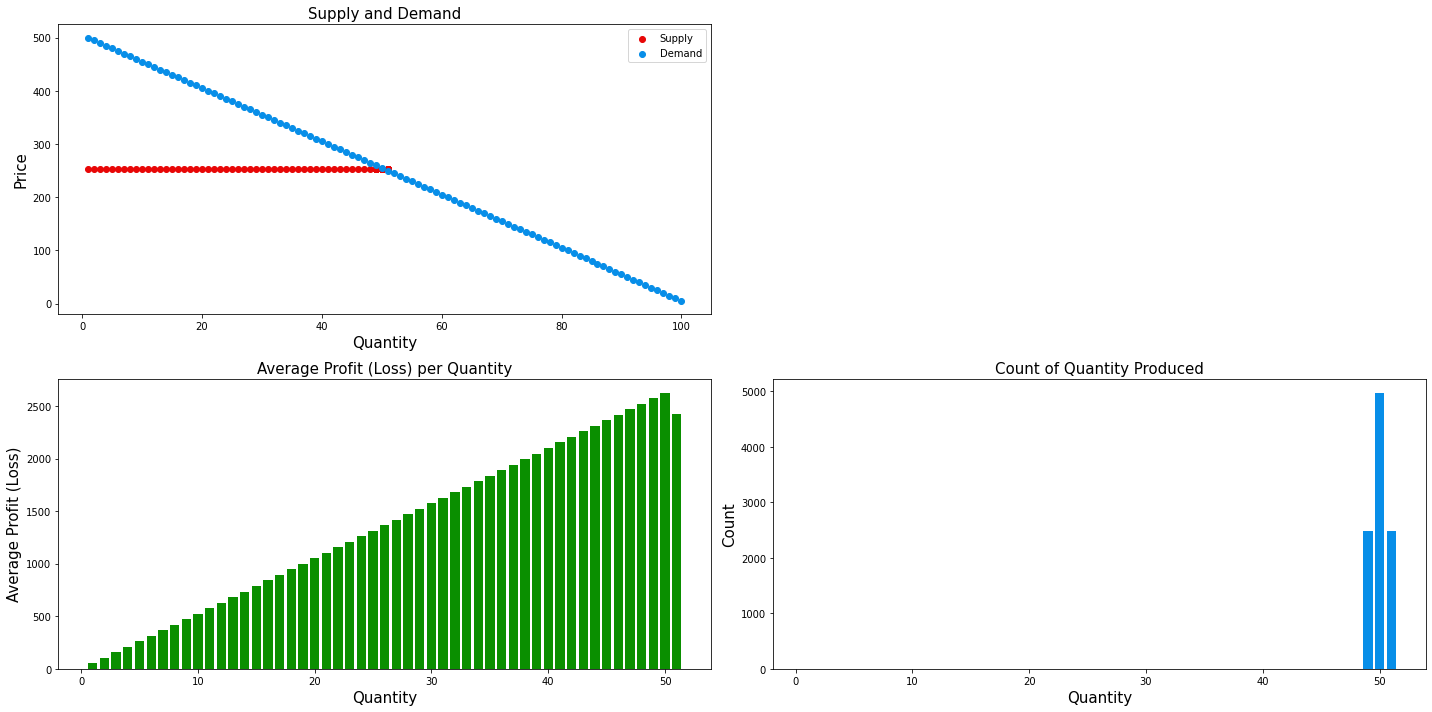

In [3]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 250*q, 0.10)

# Creating Chart
ana.single_company(m1)

#### Company 2

Like the supply curve on Company 1, Company 2's supply curve stays at a constant value; this time, the value is about 110. Since the cost of an item stays relatively low, Company 2 is able to produce more goods than Company 1, as more customers are willing to buy a product at a price of 110 than 275. However, the maximum profit Company 2 reaches is a little less than 800, which is much less than the max profit of Company 1.

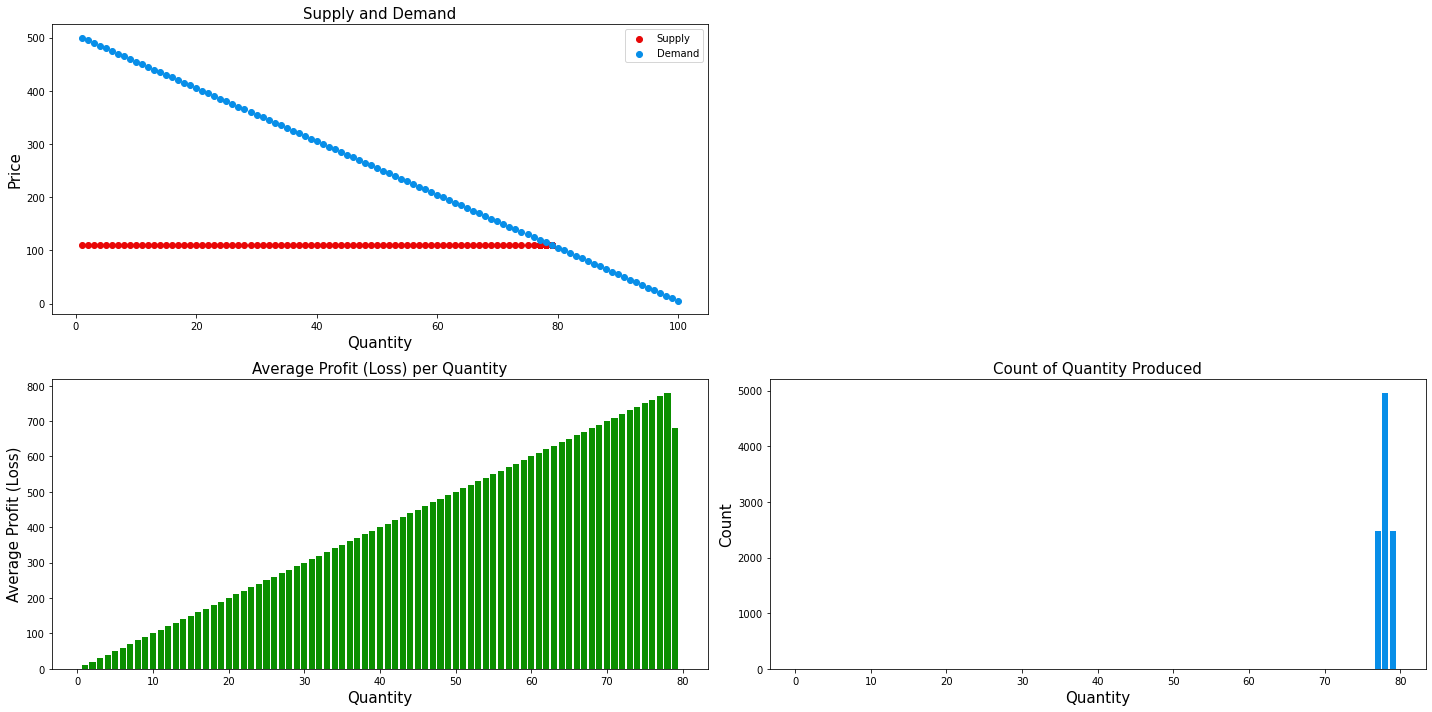

In [3]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 2', lambda q: 100*q, 0.10)

# Creating Chart
ana.single_company(m1)

#### Company 3

Improving the profit of Company 2 would mean improving the profit margin. To show this, Company 3 has the same cost function as Company 2 but a higher profit margin at 175%. This does cause Company 3 to produce less than Company, but it also allows Company 3 to generate a greater profit than Company 1 and Company 2.

This illustrates the previous point that a balance in price must be met to maximize profits.

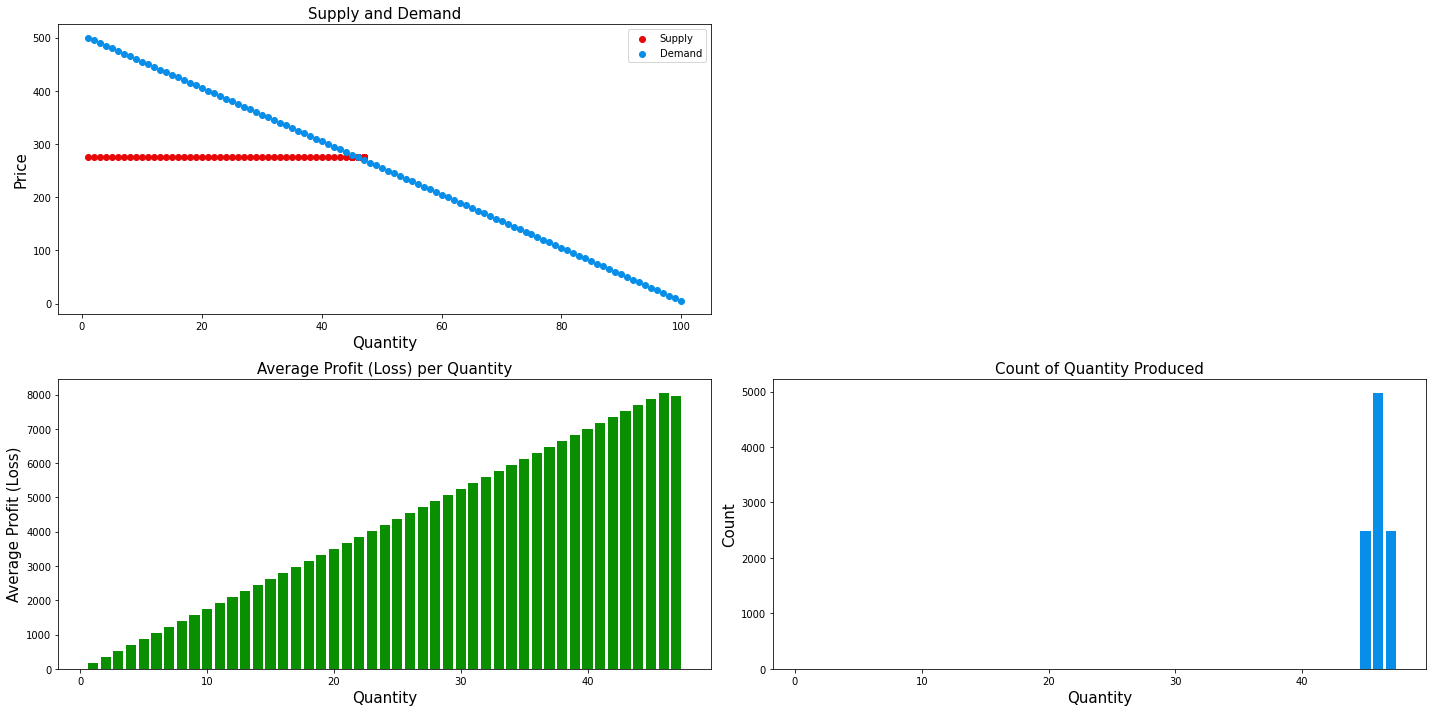

In [4]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 3', lambda q: 100*q, 1.75)

# Creating Chart
ana.single_company(m1)

#### Company 4

Company 4's cost equation starts off as less than the cost equations for Company 1, Company 2, and Company 4, but Company 4 eventually produces more expensive goods, leading to less production and lower profits than Company 1 and Company 2. This is the nature of a quadratic cost equation. An interesting fact to note is that Company 4's supply curve is a sloped line rather than a constant value. Such a sloped curve shows that the average price among all units produce increases with the square equation.

The graph can also be interpreted as showing that ever-increasing marginal costs can lead to decrease profits and fewer produceable goods.

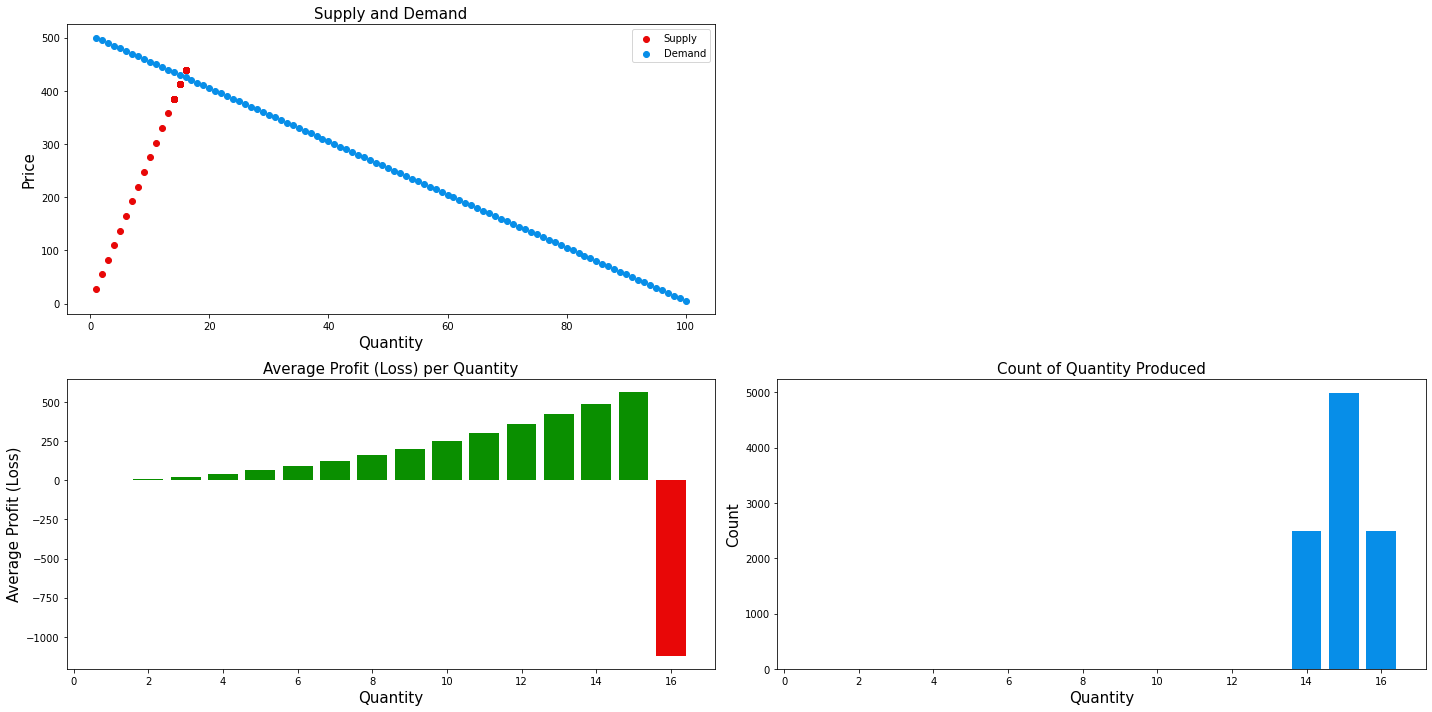

In [5]:
# Defining Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 4', lambda q: 25*q**2, 0.10)

# Creating Chart
ana.single_company(m1)

## 4. Competition on Supply and Revenue

The addition of competition can greatly affect how my program's companies optimize profits. Since buyers seek to purchase the cheapest possible product available, it is possible for a company with products selling at a low enough price to absolutely undercut their competitors. Alternatively, there maybe a few dominant companies making great profits as other companies fit into niches and still make some amount of money.

Illustrating this are a series of markets with the following companies and demands:
- Linear Competition: Contains companies with a common profit margin of 10% and different linear cost functions.
    - Company 1: $c = 100q$ at margin of 10%
    - Company 2: $c = 200q$ at margin of 10%
    - Company 3: $c = 300q$ at margin of 10%
    - Demand Curve: $d = 505 - 5q$
- Quadratic Competition: Contains companies with a common profit margin of 10% and different quadratic cost functions.
    - Company 1: $25q^{2}$ at margin of 10%
    - Company 2: $20q^{2}$ at margin of 10%
    - Company 3: $10q^{2}$ at margin of 10%
    - Demand Curve: $d = 505 - 5q$
- Linear and Quadratic Competition: Contains companies with a profit margin of 10% and a mix of linear and quadratic cost functions.
    - Company 1: $10q^{2}$ at margin of 10%
    - Company 2: $100q$ at margin of 10%
    - Demand Curve: $d = 505 - 5q$

Accompanying each simulation are a series of graphs:
- For each market,
    - A left supply and demand graphs with supply lines representing the quantiy a company can produce at a certain price and a demand line representing the consumer demand,
    - and A right supply and demand graph representing the average price of an item in a market when there is a certain quantity being produced by all companies.
- For each company, 
    - A profit vs quantity graph,
    - and A count of the times a specific quantiy was produced vs quantiy graph.

#### Linear Competition

Linear competition is meant to describe a market where competitors have costs which grow linearly. On the company supply and demand chart, multiple supply curves represent each company's production. On the profit vs quantity and count of the times a specific quantiy was produced vs quantiy graphs, the competition sees the company with the lowest cost function absolutely dominate due to customers being attracted to low prices. Thus, although the succeeding company may not benefit with high enough profits (as prices are encouraged to stay bellow competition), there is a benefit to low cost functions: market dominance.

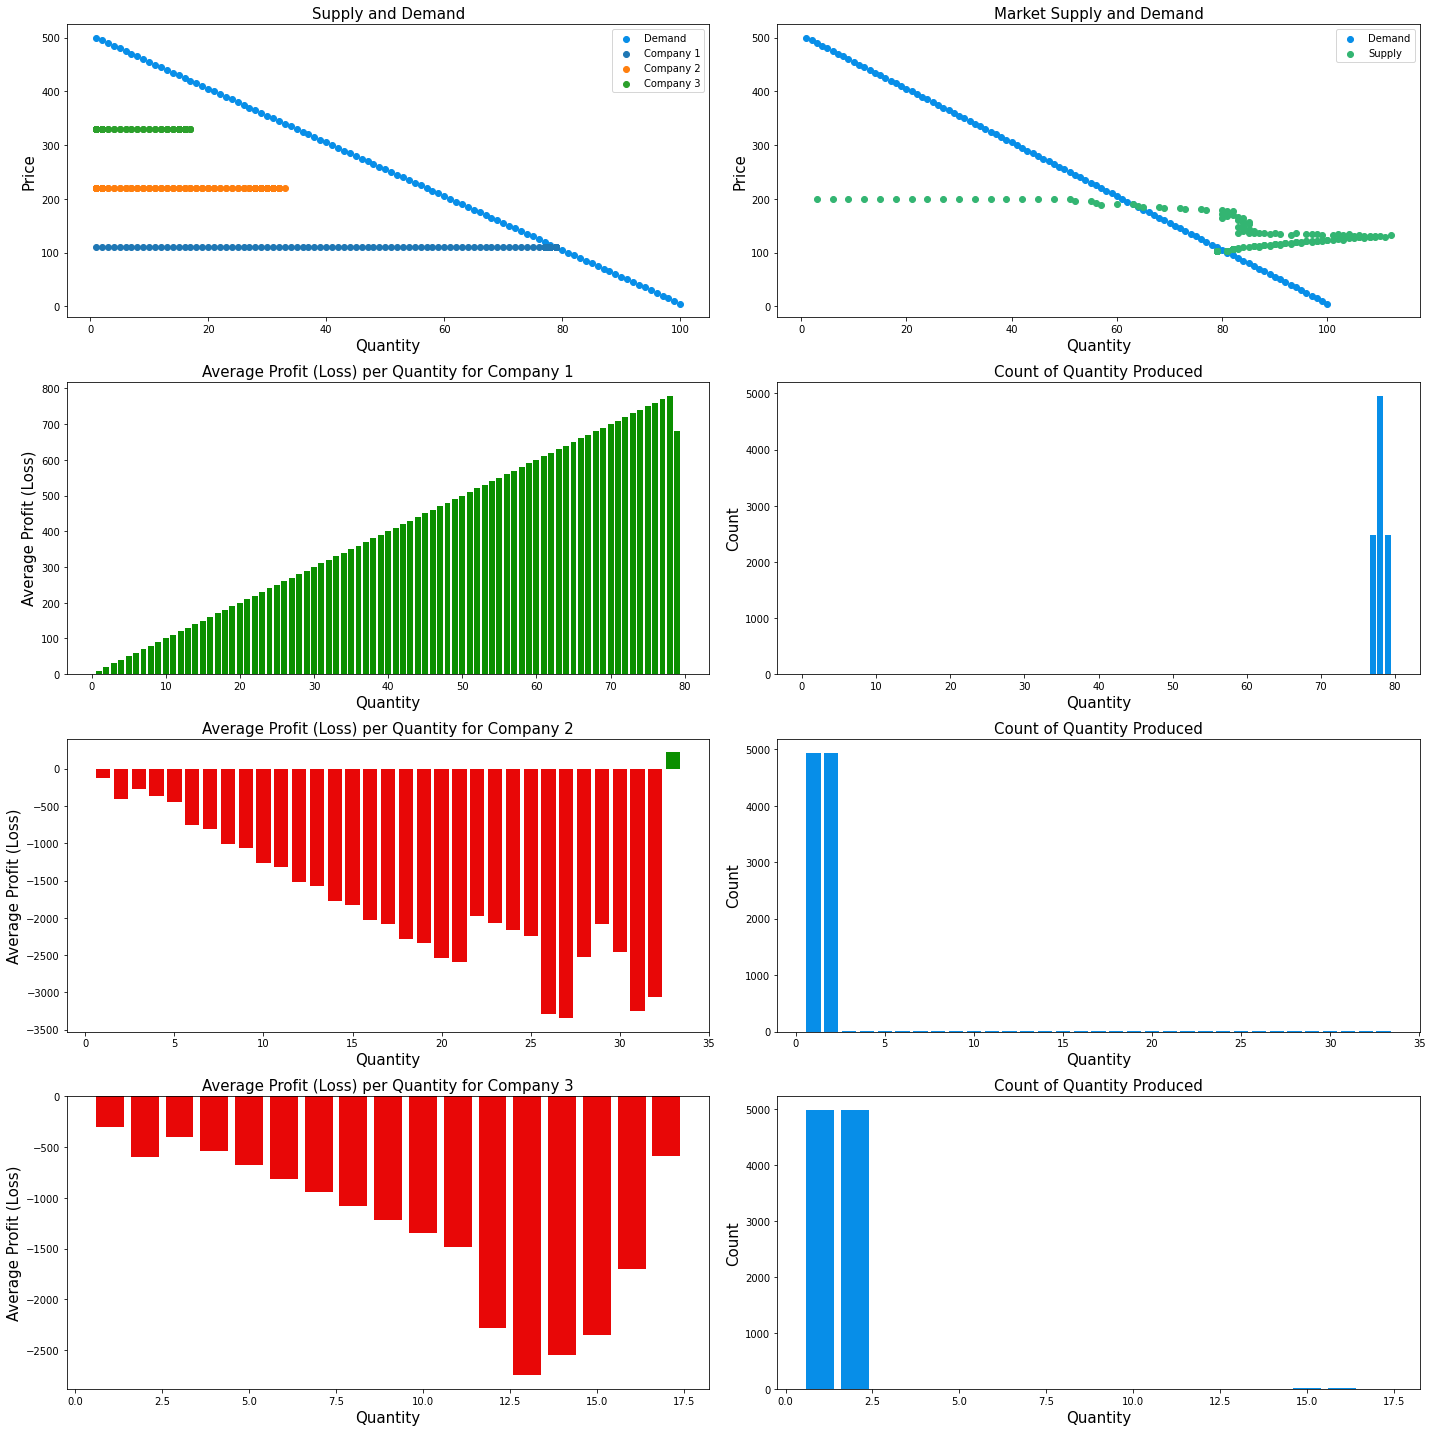

In [6]:
## Define Market
lin = Market()
lin.add_buyers(list(np.arange(1, 101)*5))
lin.add_seller('Company 1', lambda q: 100*q, 0.10)
lin.add_seller('Company 2', lambda q: 200*q, 0.10)
lin.add_seller('Company 3', lambda q: 300*q, 0.10)

# Creating Chart
ana.multiple_companies(lin)

#### Quadratic Competition

Quadratic competition involves companies with quadratic cost functions. Like linear competition, companies deal with lower potential profits compared to cases without competition (for instance a cost equation of $25q^{2}$ and margin of 10% in this market would create a profit less than the normal 500 in cases without competition). Also, the company that provides products at the lowest price dominates. However, unlike linear competition, a dominating company does not take all consumers; there are other companies which produce goods to create their own small profits. This is because linear growth allows a company to appeal to more customers without raising the average cost of goods; meanwhile, quadratic growth raises the average price of a product with every quantity produce, meaning that less customers are willing to by a good as quantity is produced and that there are leftover customers who are willing to buy other products as the dominating brand becomes too expensive.

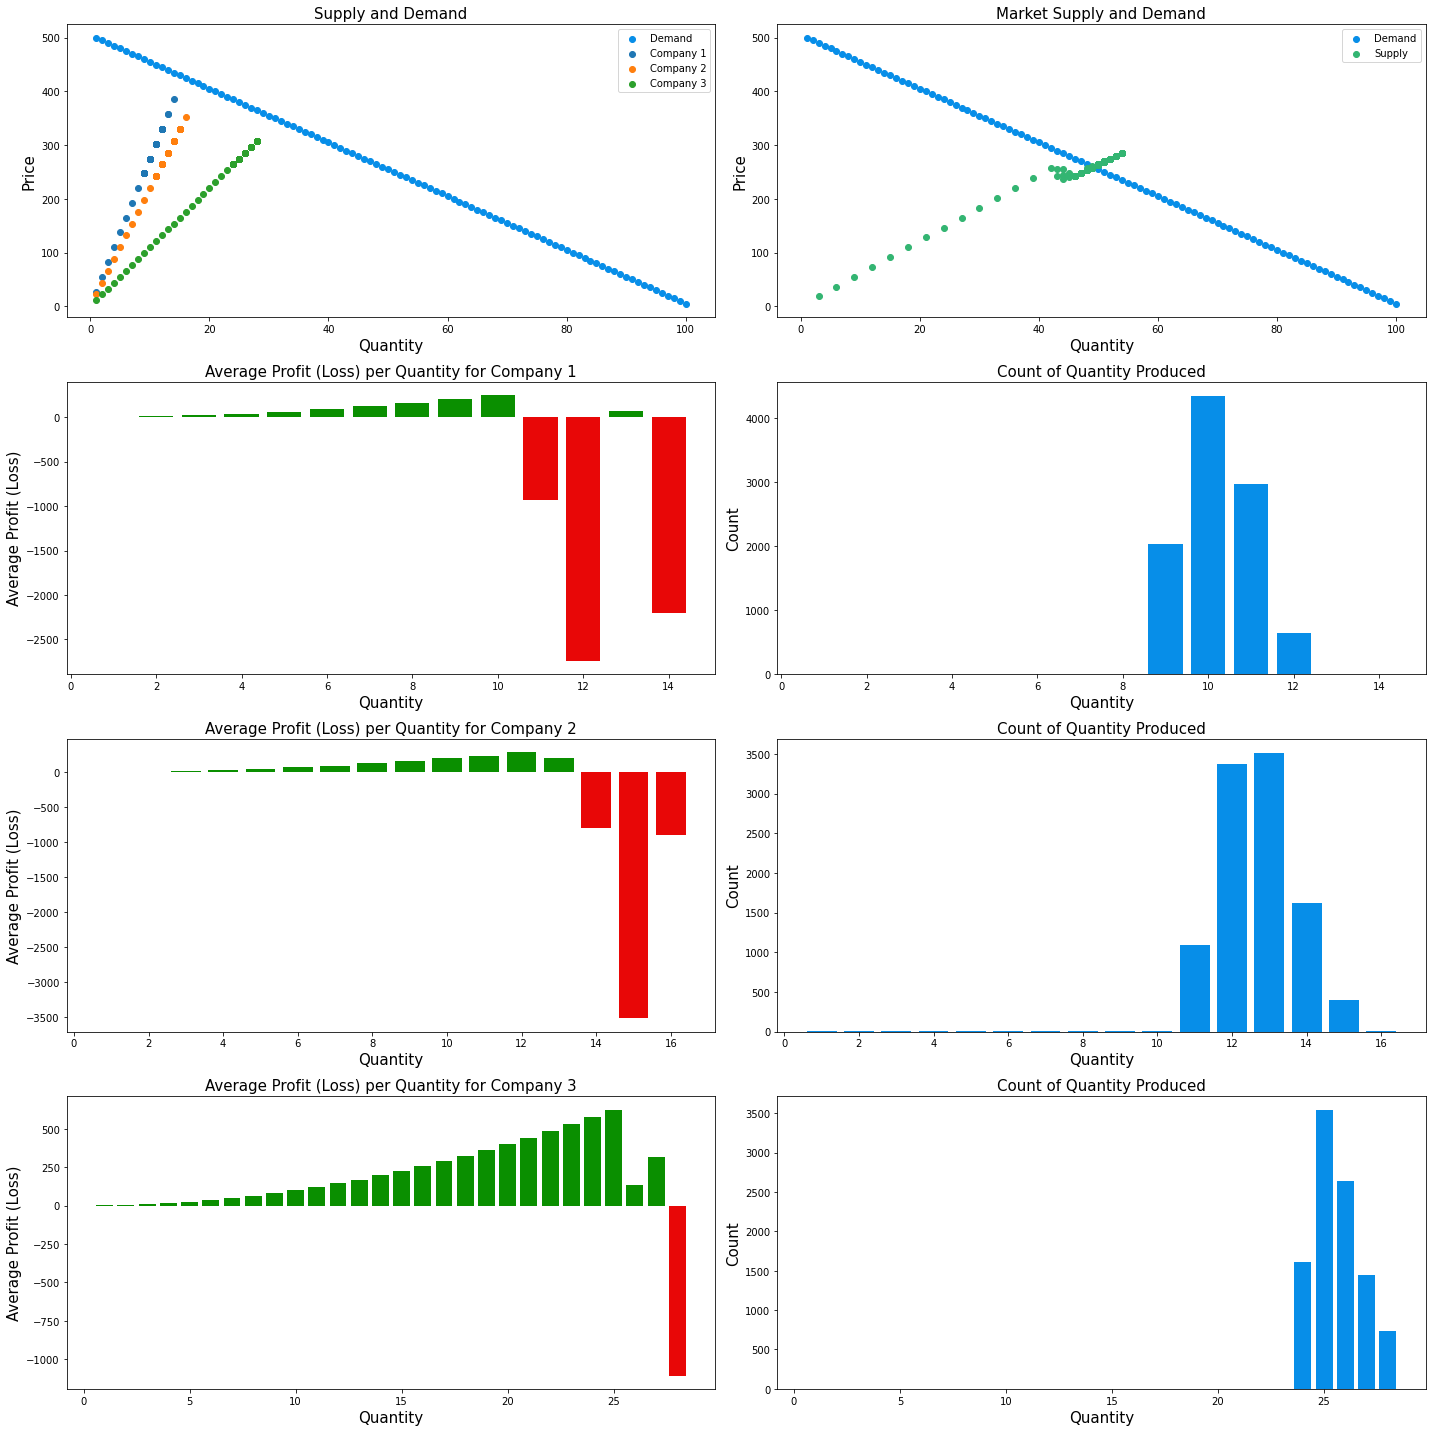

In [7]:
## Define Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 25*q**2, 0.10)
m1.add_seller('Company 2', lambda q: 20*q**2, 0.10)
m1.add_seller('Company 3', lambda q: 10*q**2, 0.10)

# Creating Chart
ana.multiple_companies(m1)

#### Linear and Quadratic Competition

For this linear and quadratic competition example, I have a company with a linear cost function (i.e., Company 1) compete with a company with a quadratic cost function (i.e., Company 2). When the companies start at producing 1 product each, Company 2 is able to produce cheaper products than Company 1. But, as more goods are produced, Company 2's products begin to rise in price, allowing Company 1 to excel at producing goods at quantities where Company 4 is more expensive. Company 4 is then left with its own niche at quantities where its products are cheaper than Company 2's products.

The outcome of this niche making are lower profits for both companies and a decrease in the quantity produced for Company 2.

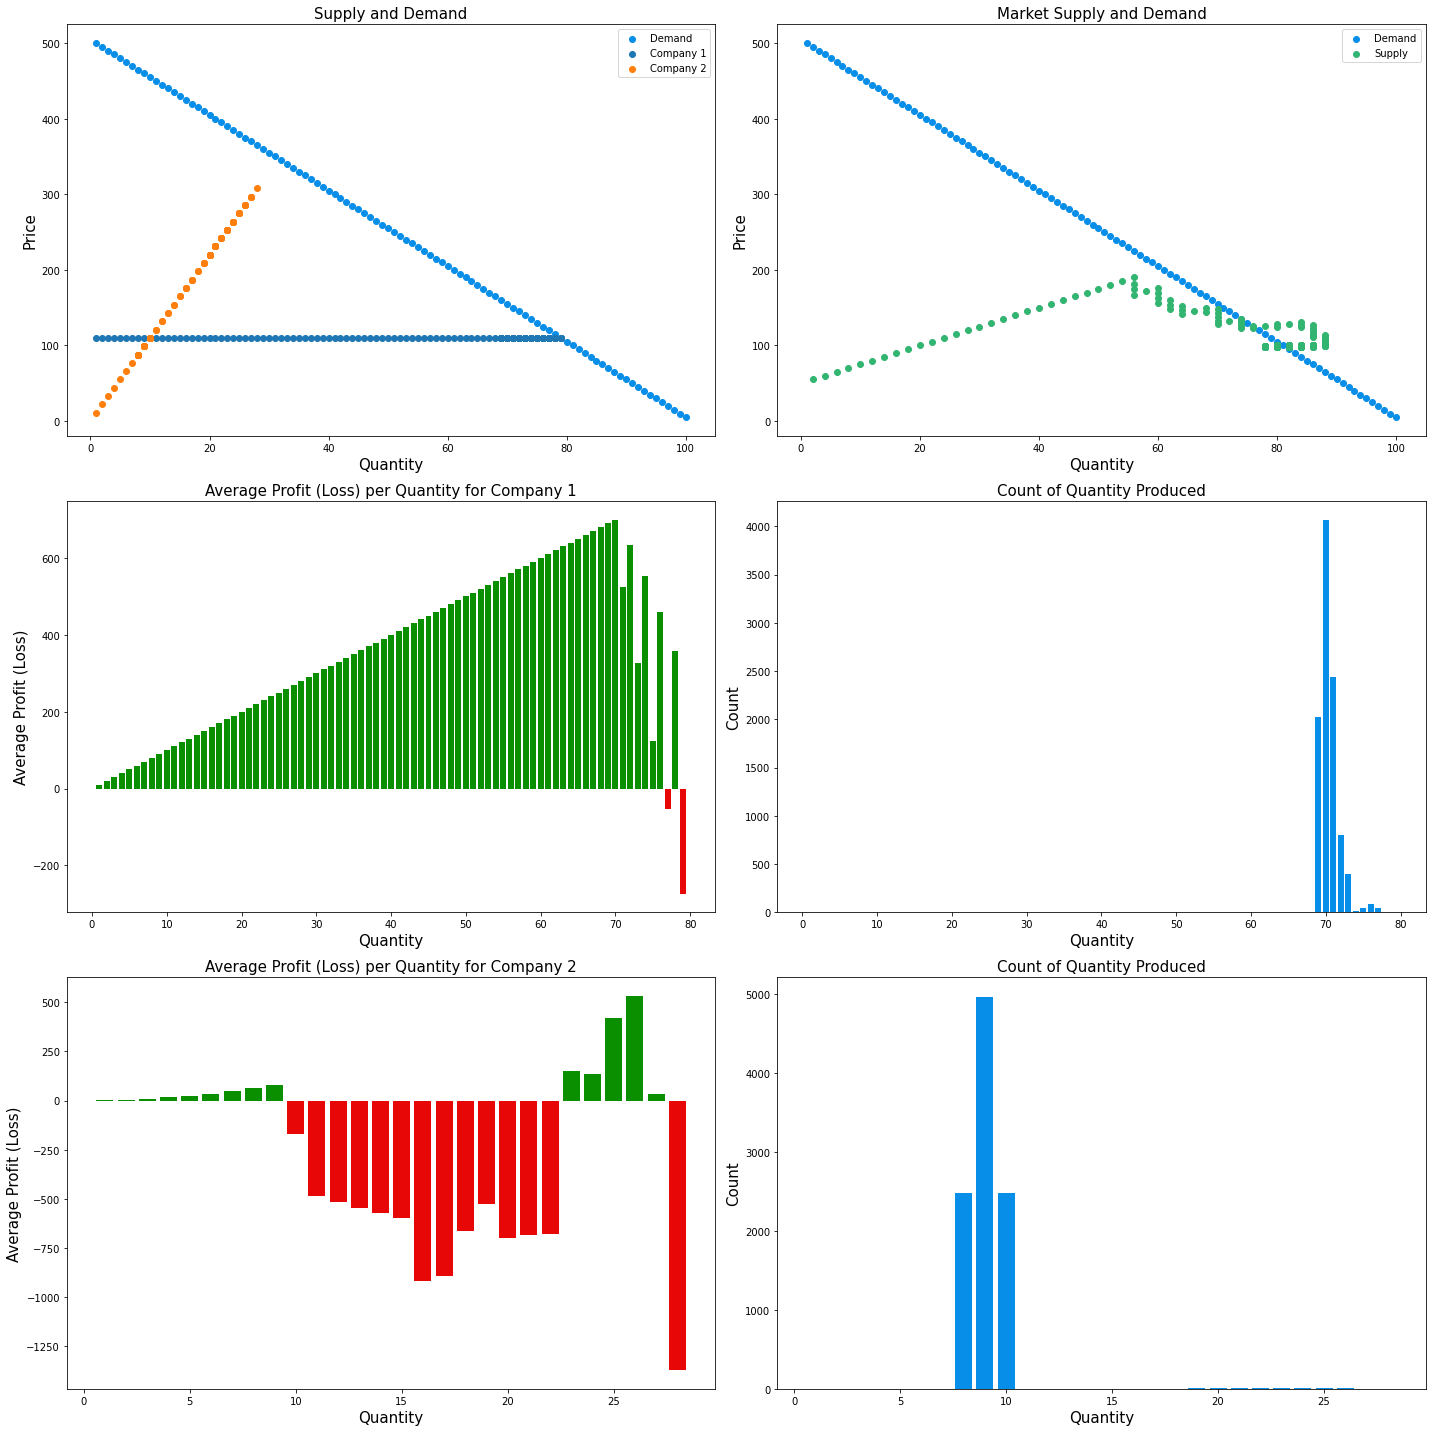

In [8]:
## Define Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 100*q, 0.10)
m1.add_seller('Company 2', lambda q: 10*q**2, 0.10)

# Creating Chart
ana.multiple_companies(m1)

## 5. Demand on Supply and Revenue

Demand is positively related to supply and revenue. As consumers demand increases (as shown by a right shift), companies will produce more goods and earn greater revenues. As consumer demand decreases (as shown by a left shift), companies will produce less goods and earn smaller revenues.

Illustrating these notes will be the following markets that show how different levels of demand impact affect supply and revenue.
- Moderate Demand:
    - Demand Curve: $d = 630 - 5q$
    - Company 1: $250q$ at margin of 10%
- Low Demand (Left Shift of 25):
    - Demand Curve: $d = 505 - 5q$
    - Company 1: $250q$ at margin of 10%
- High Demand (Right Shift of 25):
    - Demand Curve: $d = 755 - 5q$
    - Company 1: $250q$ at margin of 10%

#### Moderate Demand

This moderate demand market will serve as a base of comparison with the other markets. The company here is able to produce around 71 goods and earn a max revenue around 1750.

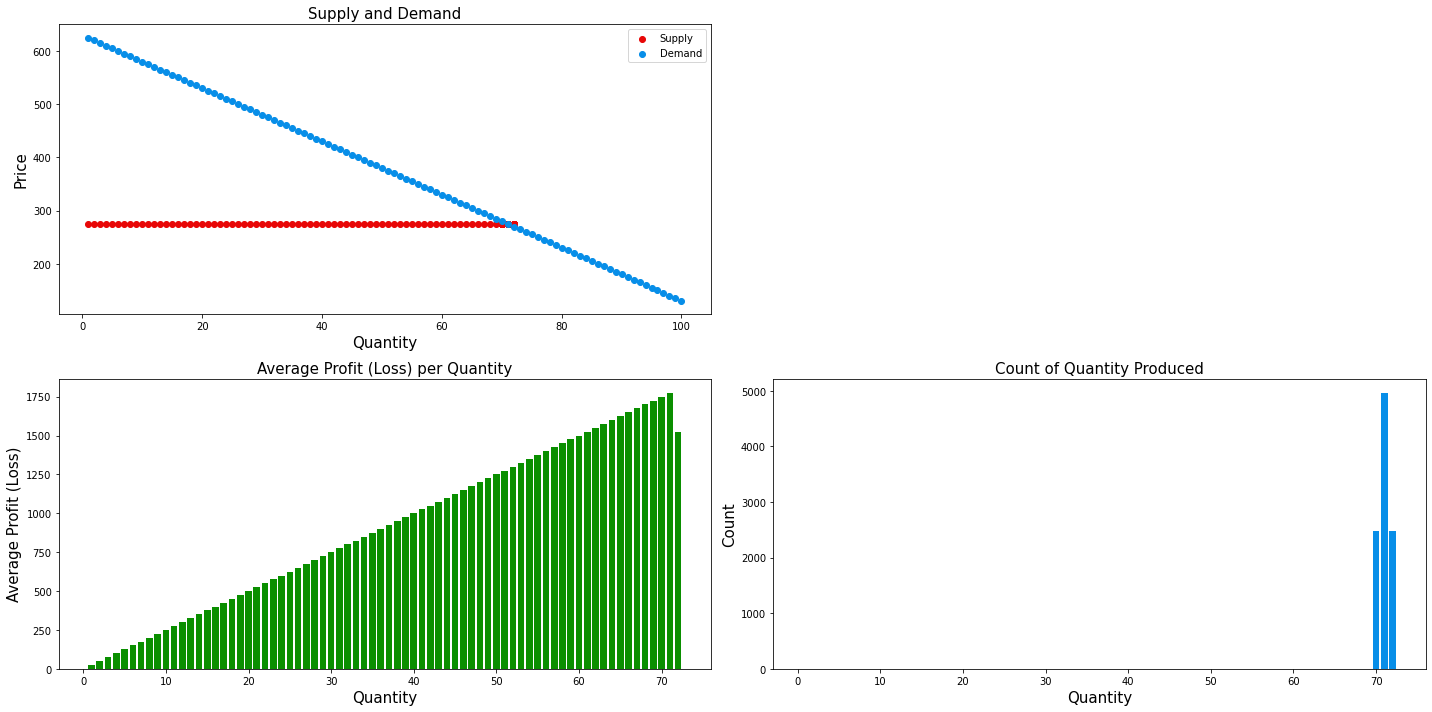

In [9]:
## Define Market
m1 = Market()
m1.add_buyers(list((np.arange(1, 101)*5) + 125))
m1.add_seller('Company 1', lambda q: 250*q, 0.10)

# Creating Chart
ana.single_company(m1)

#### Low Demand (Left Shift)

Compared to the previous market, this low demand market has seen a decrease in consumer demand by 125. Such a shift sees the company produce around 46 goods and generate a revenue a little less than 1200 - a decrease from the moderate demand market.

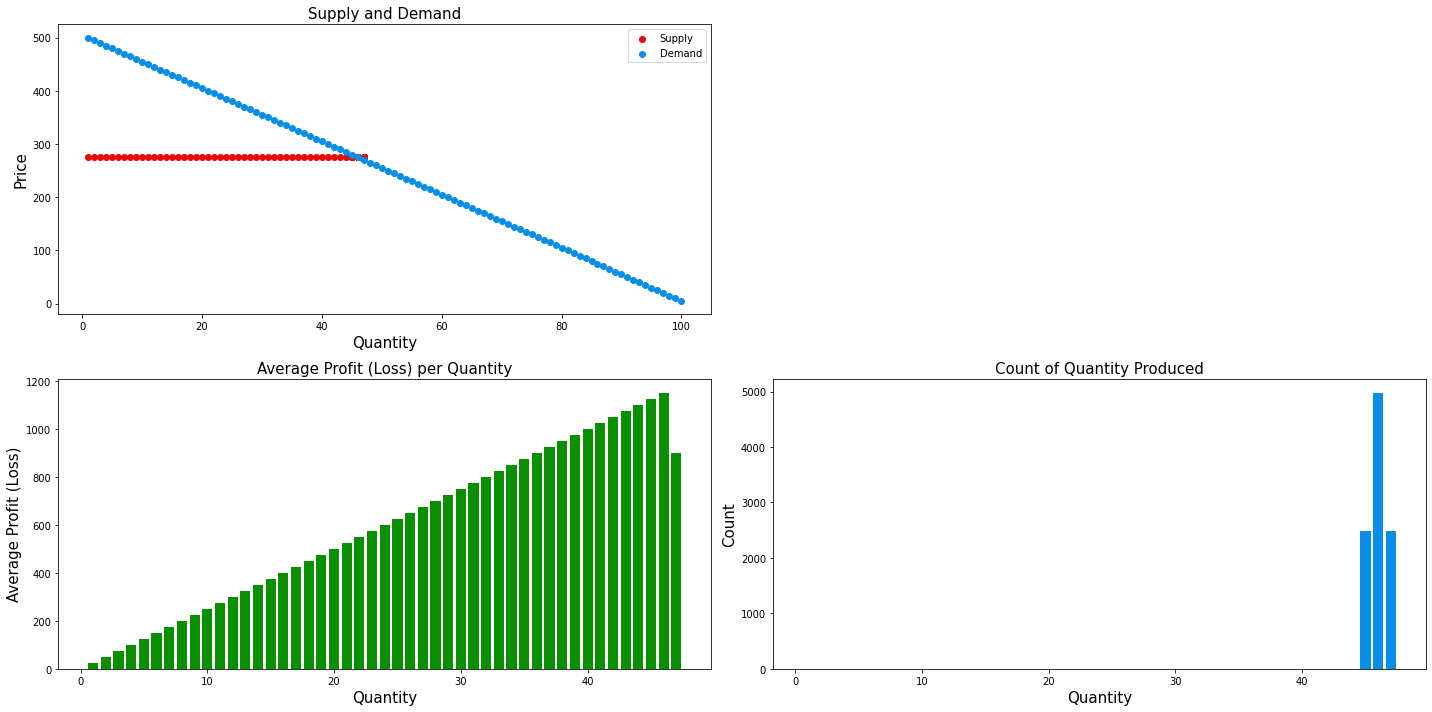

In [10]:
## Define Market
m1 = Market()
m1.add_buyers(list(np.arange(1, 101)*5))
m1.add_seller('Company 1', lambda q: 250*q, 0.10)

# Creating Chart
ana.single_company(m1)

#### High Demand (Right Shift)

In this high demand market, the demand for products increased (or shifted to the right) by 125 compared to the moderate demand market. This has allowed the company to produce around 96 goods and garner a revenue little under 2500.

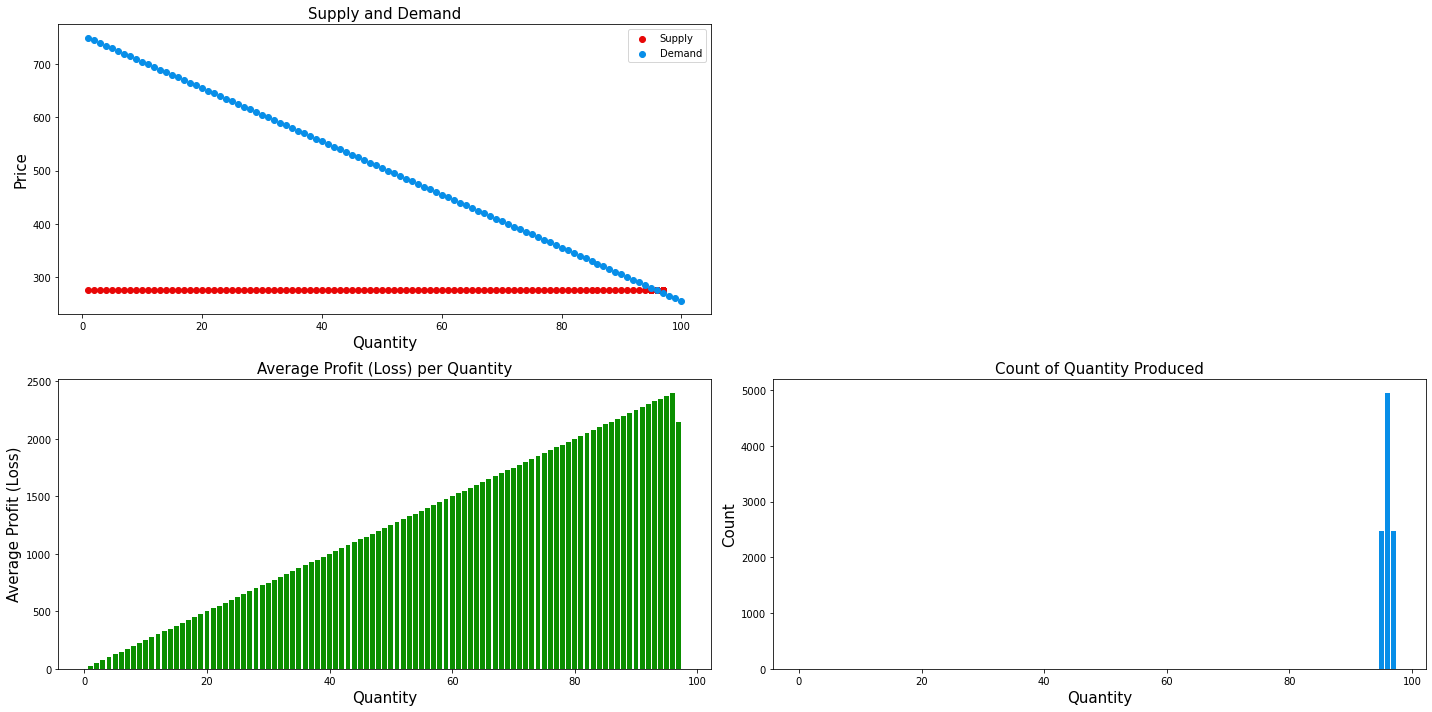

In [11]:
## Define Market
m1 = Market()
m1.add_buyers(list((np.arange(1, 101)*5) + 250))
m1.add_seller('Company 1', lambda q: 250*q, 0.10)

# Creating Chart
ana.single_company(m1)